In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/ICMRTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv


Load dataset

In [2]:
missing_values = ["n/a", "na", "-"]
dataset = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv',na_values = missing_values)

In [3]:
dataset.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1.0,0.0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1.0,0.0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2.0,0.0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3.0,0.0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3.0,0.0,0,0,3


In [4]:
cases_local = {} #dict for local cases
cases_foreign = {} #dict for foreign patients in india



for i in range(446):
    cases_local[dataset['State/UnionTerritory'][i]] = dataset['ConfirmedIndianNational'][i]
    cases_foreign[dataset['State/UnionTerritory'][i]] = dataset['ConfirmedForeignNational'][i]
print(cases_local.values())

dict_values([168.0, 46.0, 38.0, 52.0, 54.0, 19.0, 13.0, 34.0, 55.0, 177.0, 38.0, 20.0, 14.0, 4.0, 3.0, 1.0, 15.0, 1.0, 8.0, 6.0, 44.0, 1.0, 3.0, 30.0, 9.0, 1.0, 1.0, 6.0, 3.0])


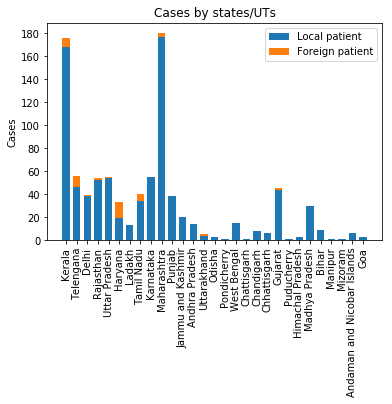

In [5]:
p1 = plt.bar(np.arange(len(cases_local)),list(cases_local.values()), 0.7)
p2 = plt.bar(np.arange(len(cases_local)), list(cases_foreign.values()), 0.7,
             bottom=list(cases_local.values()))

plt.ylabel('Cases')
plt.title('Cases by states/UTs')
plt.xticks(np.arange(len(cases_local)), cases_local.keys(),rotation='vertical')
plt.yticks(np.arange(0, 200, 20))
plt.legend((p1[0], p2[0]), ('Local patient', 'Foreign patient'))

plt.show()

In [6]:
deaths = {} #dict for deaths
for i in range(len(dataset)):
    deaths[dataset['State/UnionTerritory'][i]] = int(dataset['Deaths'][i])


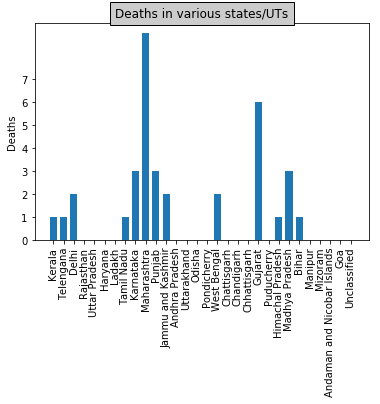

In [7]:
plt.bar(np.arange(len(deaths)),deaths.values(), 0.7)
plt.ylabel('Deaths')
plt.xticks(np.arange(len(deaths)), deaths.keys(),rotation='vertical')
plt.yticks(np.arange(0, 8, 1))
plt.title('Deaths in various states/UTs',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [8]:
cured_per_cases = {}  #percentage of cured per confirmed cases
for i in range(len(dataset)):
    cured_per_cases[dataset['State/UnionTerritory'][i]] = (dataset['Cured'][i] / (dataset['Confirmed'][i]))*100
cured_per_cases

{'Kerala': 8.11965811965812,
 'Telengana': 1.2658227848101267,
 'Delhi': 6.185567010309279,
 'Rajasthan': 4.054054054054054,
 'Uttar Pradesh': 13.861386138613863,
 'Haryana': 52.5,
 'Ladakh': 23.076923076923077,
 'Tamil Nadu': 5.405405405405405,
 'Karnataka': 6.024096385542169,
 'Maharashtra': 18.055555555555554,
 'Punjab': 2.4390243902439024,
 'Jammu and Kashmir': 3.7037037037037033,
 'Andhra Pradesh': 2.5,
 'Uttarakhand': 28.57142857142857,
 'Odisha': 0.0,
 'Pondicherry': 0.0,
 'West Bengal': 0.0,
 'Chattisgarh': 0.0,
 'Chandigarh': 0.0,
 'Chhattisgarh': 0.0,
 'Gujarat': 4.10958904109589,
 'Puducherry': 0.0,
 'Himachal Pradesh': 0.0,
 'Madhya Pradesh': 0.0,
 'Bihar': 0.0,
 'Manipur': 0.0,
 'Mizoram': 0.0,
 'Andaman and Nicobar Islands': 0.0,
 'Goa': 0.0,
 'Unclassified': 0.0}

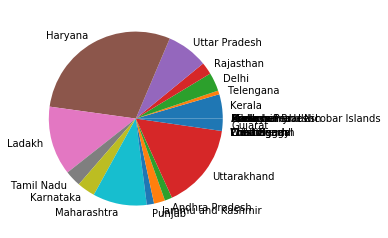

In [9]:
plt.pie([v for v in cured_per_cases.values()],labels = [k for k in cured_per_cases.keys()])
plt.show()

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


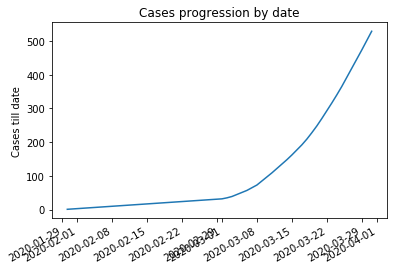

In [10]:
import datetime

start = datetime.datetime.strptime(dataset['Date'][0], "%d/%m/%y")
end = datetime.datetime.strptime(dataset['Date'][len(dataset)-1], "%d/%m/%y")
date = pd.date_range(start,end)
cases_by_date = dataset['Date'].value_counts().to_dict()

cases = []
list1 = list(cases_by_date.values())
list1.sort()

for i in range(len(date)):
    if i==0:
        cases.append(list1[i])
        
    else:
        cases.append(cases[i-1] + list1[i])
    
fig, ax = plt.subplots()
ax.plot(date,cases)
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate()
plt.title('Cases progression by date')
plt.ylabel('Cases till date')
plt.show()

In [11]:
samples_tested =  pd.read_csv('/kaggle/input/covid19-in-india/ICMRTestingDetails.csv')
samples_tested.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 0:00,6500,5900,78,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125,12235,150,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 10:00,13316,12426,168,ICMR_website_update_19March_10AM_IST_V2.pdf
3,4,19/03/20 18:00,14175,13285,182,ICMR_website_update_19March_6PM_IST.pdf
4,5,20/03/20 10:00,14376,13486,206,ICMR_website_update_20March_10AM_IST.pdf


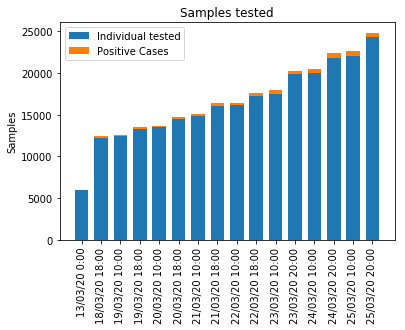

In [12]:
individual_tested = {}
positive_cases = {}
for i in range(len(samples_tested)):
    individual_tested[samples_tested['DateTime'][i]] = samples_tested['TotalIndividualsTested'][i]
    positive_cases[samples_tested['DateTime'][i]] = samples_tested['TotalPositiveCases'][i]
    
p1 = plt.bar(np.arange(len(individual_tested)),list(individual_tested.values()), 0.7)
p2 = plt.bar(np.arange(len(positive_cases)), list(positive_cases.values()), 0.7,
             bottom=list(individual_tested.values()))

plt.ylabel('Samples')
plt.title('Samples tested')
plt.xticks(np.arange(len(individual_tested)), individual_tested.keys(),rotation='vertical')
#plt.yticks(np.arange(0, 200, 20))
plt.legend((p1[0], p2[0]), ('Individual tested', 'Positive Cases'))

plt.show()

In [13]:
AgeGroupDetails =  pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv')
AgeGroupDetails.head()


,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [14]:
age_percent = {}
for i in range(len(AgeGroupDetails)):
    age_percent[AgeGroupDetails['AgeGroup'][i]] = AgeGroupDetails['Percentage'][i][0:-1]
age_percent

{'0-9': '3.18',
 '10-19': '3.90',
 '20-29': '24.86',
 '30-39': '21.10',
 '40-49': '16.18',
 '50-59': '11.13',
 '60-69': '12.86',
 '70-79': '4.05',
 '>=80': '1.45',
 'Missing': '1.30'}

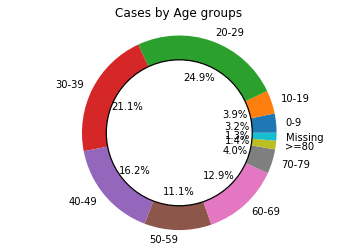

In [15]:
plt.pie(age_percent.values(), labels=age_percent.keys(), autopct='%1.1f%%')
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Cases by Age groups')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

In [16]:
IndividualDetails =  pd.read_csv('/kaggle/input/covid19-in-india/IndividualDetails.csv')
IndividualDetails.head()


,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,NaN


In [17]:
gender = IndividualDetails['gender'].value_counts().to_dict()
gender

{'M': 351, 'F': 182}

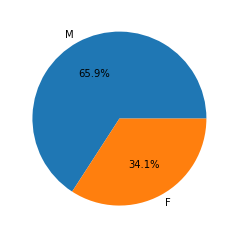

In [18]:
plt.pie(gender.values(),labels=gender.keys(),autopct='%1.1f%%')
plt.show()

In [19]:
IndividualDetails.isnull().sum()

id                       0
government_id         1047
diagnosed_date           0
age                    819
gender                 771
detected_city          661
detected_district      349
detected_state         219
nationality            890
current_status         219
status_change_date     222
notes                  244
dtype: int64

null values of Age can be replaced by age group percentage

In [20]:
import random

age_grp = [5,15,25,35,45,55,65,75,85,90]
weights = list((age_percent.values()))
for i in range(len(weights)):
    weights[i] = round(float(weights[i]))
prob = random.choices(age_grp, weights=weights,   k=100)

null_age = IndividualDetails['age'].isnull()
for i in range(len(null_age)):
    if null_age[i]== True:
        IndividualDetails['age'][i] = prob[i%100]
        
IndividualDetails['nationality'].fillna('India',inplace=True) #as most of the patients are Indians


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [21]:
prob1 = random.choices(['M','F'],weights = [66,34],k=100) #except null values ratio for gender is 66/34
null_gender = IndividualDetails['gender'].isnull()
for i in range(len(null_gender)):
    if null_gender[i]== True:
        IndividualDetails['gender'][i] = prob1[i%100]
IndividualDetails.isnull().sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


id                       0
government_id         1047
diagnosed_date           0
age                      0
gender                   0
detected_city          661
detected_district      349
detected_state         219
nationality              0
current_status         219
status_change_date     222
notes                  244
dtype: int64

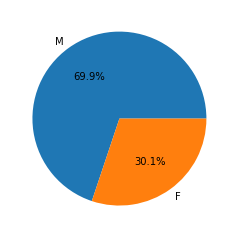

In [22]:
IndividualDetails['gender']
gender = IndividualDetails['gender'].value_counts().to_dict()
plt.pie(gender.values(),labels=gender.keys(),autopct='%1.1f%%')
plt.show()
